In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

##### We have 5 products with us, we will call them x1, x2, x3, x4, x5.

##### The main equation for optimizing:-
##### z = 5x_1 + 4x_2 + 6x_3 + 7x_4 + 8x_5

In [ ]:
# Declaring the variable for each product
x1 = x2 = x3 = x4 = x5 = 0

##### Given that the total labour available is 100 units, and also for each product the amount of labor required that is for,
##### product 1 = 2
##### Product 2 = 3
##### Product 3 = 1
##### Product 4 = 4
##### Product 5 = 5

In [ ]:
# Making the equation for labour
# 2x1 + 3x2 + 1x3 + 4x4 + 5x5 = 100

##### Each product requires its own machine time that is for,
##### product 1 = 3
##### Product 2 = 2
##### Product 3 = 4
##### Product 4 = 1
##### Product 5 = 5

In [ ]:
# Making the equation for machine time
# 3x1 + 2x2 + 4x3 + x4 + 3x5 = 80

##### Each product requires its own raw materials that is for,
##### product 1 = 4
##### Product 2 = 1
##### Product 3 = 3
##### Product 4 = 2
##### Product 5 = 2

In [ ]:
# Making the equation for material
# 4x1 + x2 + 3x3 + 2x4 + 2x5 = 70

Feasible solution found: [ 5.  5.  5.  5. 10.]


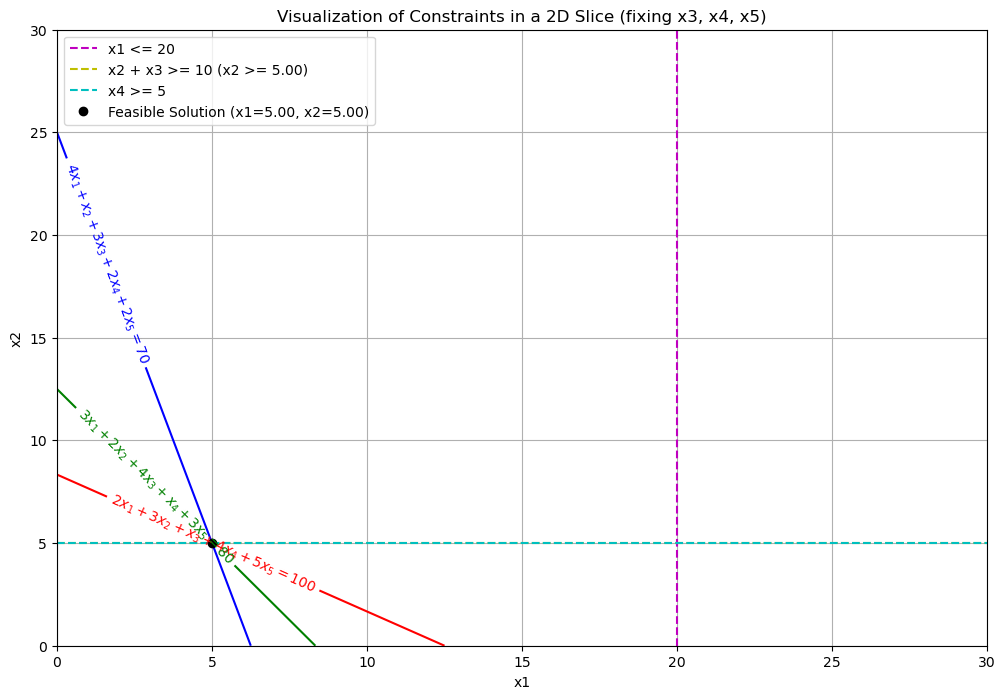

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define coefficients for the equations
A_eq = [
    [2, 3, 1, 4, 5],
    [3, 2, 4, 1, 3],
    [4, 1, 3, 2, 2]
]

b_eq = [100, 80, 70]

# Inequality constraints: converting inequalities to <= form
A_ub = [
    [1, 0, 0, 0, 0],  # x1 <= 20 -> x1 <= 20
    [0, -1, -1, 0, 0],  # x2 + x3 >= 10 -> -x2 - x3 <= -10
    [0, 0, 0, -1, 0]   # x4 >= 5 -> -x4 <= -5
]

b_ub = [20, -10, -5]

# Objective function (arbitrary since we are interested in constraints)
c = [0, 0, 0, 0, 0]

# Find a feasible solution using linprog
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='highs')

if res.success:
    x_solution = res.x
    print("Feasible solution found:", x_solution)
else:
    print("No feasible solution found")

# For visualization, we'll fix x3, x4, x5 and vary x1, x2
x3 = x_solution[2]
x4 = x_solution[3]
x5 = x_solution[4]

x1_range = np.linspace(0, 30, 400)
x2_range = np.linspace(0, 30, 400)

X1, X2 = np.meshgrid(x1_range, x2_range)

# Recalculate the equations with fixed x3, x4, x5
eq1 = 2*X1 + 3*X2 + x3 + 4*x4 + 5*x5
eq2 = 3*X1 + 2*X2 + 4*x3 + x4 + 3*x5
eq3 = 4*X1 + X2 + 3*x3 + 2*x4 + 2*x5

# Create a plot to visualize the constraints
plt.figure(figsize=(12, 8))

contour1 = plt.contour(X1, X2, eq1, levels=[100], colors='r')
contour2 = plt.contour(X1, X2, eq2, levels=[80], colors='g')
contour3 = plt.contour(X1, X2, eq3, levels=[70], colors='b')

# Labeling the contour lines with their equations
plt.clabel(contour1, inline=1, fontsize=10, fmt={100: r'$2x_1 + 3x_2 + x_3 + 4x_4 + 5x_5 = 100$'})
plt.clabel(contour2, inline=1, fontsize=10, fmt={80: r'$3x_1 + 2x_2 + 4x_3 + x_4 + 3x_5 = 80$'})
plt.clabel(contour3, inline=1, fontsize=10, fmt={70: r'$4x_1 + x_2 + 3x_3 + 2x_4 + 2x_5 = 70$'})

# Plotting inequality constraints
plt.axvline(x=20, color='m', linestyle='--', label='x1 <= 20')

x2_constraint = 10 - x3
plt.axhline(y=x2_constraint, color='y', linestyle='--', label=f'x2 + x3 >= 10 (x2 >= {x2_constraint:.2f})')

plt.axhline(y=5, color='c', linestyle='--', label='x4 >= 5')

# Add the feasible solution point
plt.plot(x_solution[0], x_solution[1], 'ko', label=f'Feasible Solution (x1={x_solution[0]:.2f}, x2={x_solution[1]:.2f})')

plt.title('Visualization of Constraints in a 2D Slice (fixing x3, x4, x5)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.grid(True)

plt.show()

